<h1 align="center"> Using Support Vector Machine to Classify the Boundaries</h1>

### 1. Read the null data into Dataframe

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics

In [2]:
dat=pd.read_csv('null.txt',delim_whitespace=True,header=None)

In [3]:
dat.shape

(219, 11)

In [4]:
dat.columns=["Nst","Nph","Event","Stlat","Stlon","Mean_phi","Mean_dt","Rlon","Rlat","Baz","TorF"]
dat

,Nst,Nph,Event,Stlat,Stlon,Mean_phi,Mean_dt,Rlon,Rlat,Baz,TorF
0,H1070x_XF,PKS,EQ041810701,29.78,85.76,23.718,1.120,85.736,29.903,349.16,T
1,H1080x_XF,PKS,EQ041810701,29.85,85.78,30.500,0.775,85.757,29.973,349.20,T
2,H1080x_XF,PKS,EQ043250807,29.85,85.78,30.500,0.775,85.747,29.970,344.60,T
3,H1080x_XF,PKS,EQ043252201,29.85,85.78,38.198,1.320,85.757,30.068,354.07,T
4,H1090x_XF,PKS,EQ042832126,29.92,85.73,38.198,1.320,85.689,30.126,348.76,T
...,...,...,...,...,...,...,...,...,...,...,...
214,H0730x_XF,SKS,EQ032331212,29.17,85.36,55.000,1.100,85.674,28.871,133.56,F
215,H0730x_XF,SKS,EQ033592042,29.17,85.36,172.000,1.100,85.833,28.977,112.16,U
216,H0750x_XF,SKS,EQ032331212,29.23,85.31,55.000,1.100,85.624,28.932,133.53,F
217,H0790x_XF,SKS,EQ042721529,29.38,85.23,73.570,1.400,84.966,28.942,211.08,T


In [5]:
dat.shape

(219, 11)

In [6]:
dat=dat.loc[dat['TorF']!='U']

In [7]:
dat.shape

(203, 11)

In [8]:
dat.sample(10)

,Nst,Nph,Event,Stlat,Stlon,Mean_phi,Mean_dt,Rlon,Rlat,Baz,TorF
21,H1260x_XF,PKS,EQ043250807,31.15,85.01,95.000,1.200,84.951,31.353,343.89,F
73,H0740x_XF,PKS,EQ040620347,29.20,85.36,75.255,1.228,85.315,29.414,348.26,F
207,H0700x_XF,SKS,EQ033592042,29.06,85.42,55.000,1.100,85.894,28.867,112.19,T
74,H0740x_XF,PKS,EQ041200057,29.20,85.36,69.858,1.179,85.330,29.329,346.89,F
111,H0090x_XF,PKS,EQ030220206,27.20,84.98,89.528,1.414,85.045,27.509,11.89,F
70,H0660x_XF,PKS,EQ040620347,28.92,85.42,85.000,0.850,85.393,29.050,348.28,F
191,H0610x_XF,SKS,EQ040510558,28.75,85.30,77.745,1.214,85.871,28.604,104.35,T
138,H0630x_XF,PKS,EQ041200057,28.82,85.29,72.500,1.225,85.253,28.978,346.69,F
80,H1050x_XF,PKS,EQ041810701,29.64,85.72,74.359,1.114,85.695,29.770,349.07,F
127,H0340x_XF,PKS,EQ031711330,27.89,85.15,94.500,1.175,85.056,27.868,256.80,F


In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 217
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nst       203 non-null    object 
 1   Nph       203 non-null    object 
 2   Event     203 non-null    object 
 3   Stlat     203 non-null    float64
 4   Stlon     203 non-null    float64
 5   Mean_phi  203 non-null    float64
 6   Mean_dt   203 non-null    float64
 7   Rlon      203 non-null    float64
 8   Rlat      203 non-null    float64
 9   Baz       203 non-null    float64
 10  TorF      203 non-null    object 
dtypes: float64(7), object(4)
memory usage: 19.0+ KB


In [10]:
dat.describe()

,Stlat,Stlon,Mean_phi,Mean_dt,Rlon,Rlat,Baz
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,29.322956,85.143054,75.137300,1.092768,85.290926,29.344498,185.430394
std,1.730568,0.372024,20.428337,0.192540,0.459285,1.786199,123.239788
min,26.710000,83.870000,19.000000,0.550000,83.809000,26.694000,8.550000
25%,27.900000,85.010000,61.989000,0.970000,85.048000,28.004000,101.480000
50%,28.980000,85.190000,78.628000,1.100000,85.328000,28.939000,112.290000
75%,30.465000,85.350000,88.419500,1.226500,85.690000,30.492500,343.950000
max,33.970000,85.920000,179.424000,1.700000,86.082000,33.908000,356.300000


### 2. Data Preprocessing

We use the sklearn.model_selection.train_test_split() method to split the dataset into test and training sets. Major parameters are:

- **test_size** : float, int, or None (default is None). If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is automatically set to the complement of the train size. If train size is also None, test size is set to 0.25.

- **train_size** : float, int, or None (default is None). If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

- **random_state** : Pseudo-random number generator state used for random sampling.

In [11]:
# 10-90% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = model_selection.train_test_split(dat['TorF'], 
                                                                 dat.drop(['TorF','Nst','Nph','Event','Stlat','Stlon','Mean_phi','Mean_dt','Baz'], axis=1),
                                                                 test_size=0.1,
                                                                 random_state=100)

In [12]:
train_y.shape

(182,)

In [13]:
test_y.shape

(21,)

In [14]:
train_X.shape

(182, 2)

In [15]:
test_X.shape

(21, 2)

### 3. Support Vector Machine

First, build a support vector classifier with linear kernel. We manually set the parameter C as 1.0. Then we use the test set to evaluate performance of the SVC.

In [16]:
from sklearn import svm

In [17]:
# Train an SVC with linear kernel
svc_linear = svm.SVC(kernel='linear', C=1.0)

In [18]:
svc_linear.fit(train_X,train_y)

SVC(kernel='linear')

In [19]:
# Predict on test set
pred_y1 = svc_linear.predict(test_X)

In [20]:
# Count of the values in the test_y
test_y.value_counts()

F    11
T    10
Name: TorF, dtype: int64

In [21]:
# Count of the values in the pred_y
pd.Series(pred_y1).value_counts()

F    11
T    10
dtype: int64

In [22]:
# Print confusion matrix
print(metrics.confusion_matrix(test_y, pred_y1))

[[8 3]
 [3 7]]


We can see that the trained SVC has bad performance.

In [23]:
# Calculate classification accuracy
metrics.accuracy_score(test_y, pred_y1)

0.7142857142857143

In [24]:
# Print classification report
print(metrics.classification_report(test_y, pred_y1))

              precision    recall  f1-score   support

           F       0.73      0.73      0.73        11
           T       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21



### 4. Tune Hyper-parameters

We need to tune the parameters in order to get a model with better performance.

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

We can use the sklearn.model_selection.GridSearchCV() to implement the hyper-parameter tuning procedure. Please note that the grid search algorithm might be time consuming when we have complicated models and very large dataset

parameters = {'kernel':['rbf','linear'],
              'C':np.logspace(0.001,100,num=5),
              'gamma':[0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]}
parameters

In [35]:
parameters = {'kernel':['rbf'],
              'C':[0.0001,0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5]}
parameters

{'kernel': ['rbf'],
 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]}

In [36]:
svc = svm.SVC(probability=True)

In [37]:
grid_svc = model_selection.GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

In [38]:
# Resample the training dataset
new_train_y=dat['TorF']

In [39]:
new_train_y.shape

(203,)

In [40]:
new_train_X=pd.concat([dat['Rlon'],dat['Rlat']],axis=1)

In [41]:
new_train_X.shape

(203, 2)

In [42]:
grid_svc.fit(new_train_X,new_train_y)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

In [43]:
#show the best parameter
grid_svc.best_params_

{'C': 10, 'gamma': 0.02, 'kernel': 'rbf'}

Train the new SVM with best parameter

In [45]:
svc_final_1=svm.SVC(kernel='rbf',C=10,gamma=0.02)

In [46]:
svc_final_1.fit(train_X,train_y)

SVC(C=10, gamma=0.02)

In [47]:
pred_y2=svc_final_1.predict(test_X)

In [48]:
print(metrics.confusion_matrix(test_y, pred_y2))

[[8 3]
 [3 7]]


In [49]:
print(metrics.classification_report(test_y, pred_y2))

              precision    recall  f1-score   support

           F       0.73      0.73      0.73        11
           T       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21



In [50]:
#Since Polynormial takes much more time to grid search, we seperate the process here.
parameters = {'kernel':['poly'],
              'degree':[4],
              'C':[0.0001,0.001,0.01,0.1,1,10,100]}
parameters

{'kernel': ['poly'],
 'degree': [4],
 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [51]:
grid_svc = model_selection.GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=False)

In [52]:
grid_svc.fit(new_train_X,new_train_y)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [4], 'kernel': ['poly']},
             scoring='accuracy')

In [53]:
grid_svc.best_params_

{'C': 1, 'degree': 4, 'kernel': 'poly'}

In [54]:
svc_final_2=svm.SVC(kernel='poly',C=1,degree=4)

In [55]:
svc_final_2.fit(train_X,train_y)

SVC(C=1, degree=4, kernel='poly')

In [56]:
pred_y2=svc_final_2.predict(test_X)

In [57]:
print(metrics.confusion_matrix(test_y, pred_y2))

[[8 3]
 [3 7]]


In [58]:
print(metrics.classification_report(test_y, pred_y2))

              precision    recall  f1-score   support

           F       0.73      0.73      0.73        11
           T       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21



### 5. Plot the decision boundaries

In [59]:
import matplotlib.pyplot as plt

In [60]:
x_min, x_max = new_train_X['Rlon'].min() - 1, new_train_X['Rlon'].max() + 1

In [61]:
y_min, y_max = new_train_X['Rlat'].min() - 1, new_train_X['Rlat'].max() + 1

In [62]:
# step size in the mesh
h = 0.02

In [63]:
# refer to https://blog.csdn.net/sinat_29957455/article/details/78825945 for detailed explanation in Chinese
# Return coordinate matrices from coordinate vectors. 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [64]:
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 4) kernel']

c:\users\csgg2\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\users\csgg2\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\users\csgg2\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


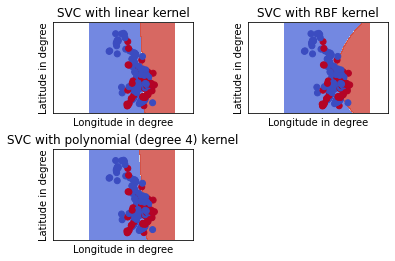

In [65]:
for i, clf in enumerate((svc_linear,svc_final_1,svc_final_2)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    #Translates slice objects to concatenation along the second axis
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z= np.where(Z=='T',1,Z)
    Z= np.where(Z=='F',0,Z)
    Z = Z.reshape(xx.shape)
    Y = np.where(new_train_y=='T',1,new_train_y)
    Y = np.where(Y=='F',0,Y)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Plot also the training points
    plt.scatter(new_train_X['Rlon'],new_train_X['Rlat'],c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Longitude in degree')
    plt.ylabel('Latitude in degree')
    plt.xlim(81.00,88.00)
    plt.ylim(26.00,35.00)
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()